In [ ]:
# installing required libraries
install.packages("grf")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("haven")
install.packages("survey")

# loading required libraries
library(grf)
library(dplyr)
library(ggplot2)
library(haven)
library(survey)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("grf"):
“installation of package ‘grf’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("ggplot2"):
“installation of package ‘ggplot2’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘numDeriv’, ‘mitools’, ‘RcppArmadillo’


Warning message in install.packages("survey"):
“installation of package ‘survey’ had non-zero exit status”


In [ ]:
if (file.exists("/content/stratsample_data.dta")) {
  data <- read_dta("/content/stratsample_data.dta")
  print(head(data))
} else {
  stop("Error: File 'stratsample_data.dta' not found in '/content/'.
        Please ensure the file is uploaded to the correct location.")
}

# A tibble: 6 × 145
  lineno   age marital   sex   vet   hga   hgc  race  stat fnlwgt ernlwt
   <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>  <dbl>  <dbl>
1      1    45       1     1     6    16     1     1     1 141885      0
2      3    50       5     1     6    40    NA     1     1 177999      0
3      2    63       1     2     6    39    NA     1     1 132510      0
4      1    37       7     2     6    43    NA     1     1     NA      0
5      1    47       5     2     6    43    NA     1     1  66892      0
6      2    64       1     2     6    36    NA     1     1  32715      0
# ℹ 134 more variables: marsupwt <dbl>, hrs1 <dbl>, whenlj <dbl>, clswkr <dbl>,
#   nlflj <dbl>, grswk <dbl>, lfsr <dbl>, untype <dbl>, nlfrea <dbl>,
#   mjind <dbl>, mjocc <dbl>, rcow <dbl>, rsnnotw <dbl>, wkswork <dbl>,
#   losewks <dbl>, lknone <dbl>, lkstrch <dbl>, phmemprs <dbl>, ljcw <dbl>,
#   occup <dbl>, clwk <dbl>, wemocg <dbl>, wemind <dbl>, noemp <dbl>,
#   ern_val <dbl>, wsal_val 

In [ ]:
# overwriting treatment group as binary
data$dis_hp <- ifelse(data$dis_hp == 1, 1, 0)

data <- data %>%
  filter(!is.na(dis_hp)) # Remove rows NA in dis_hp

 # verifying transformation
  table(data$dis_hp)

# defining and summarizing treatment indicator for post-ada period
    data$treatment <- ifelse(data$year >= 90, 1, 0)
    table(data$treatment)

# defining and summarizing lavgwkly
  # checking for non positive values in avgwkly
  summary(data$avgwkly)

  # replacing non positive values w/ NA
  data$avgwkly <- ifelse(data$avgwkly > 0, data$avgwkly, NA)

  # applying log transformation to avgwkly
  data$lavgwkly <- log(data$avgwkly)

  # varifying the transformation
  summary(data$lavgwkly)

  # removing rows non positive avgwkly
  data <- data[data$avgwkly > 0, ]

  # counting remaining NA values after transformation
  cat("Number of NA values in lavgwkly:", sum(is.na(data$lavgwkly)), "\n")


# summarizing covariates
summaries <- list(
  disabled_hp = summary(data$dis_hp), # Treatment: Self-report health problem
  lavgwkly = summary(data$lavgweekly), # Range: 0.019-24000.000
  female = summary(data$female), # Range: Binary
  age = summary(data$age), # Range: 17-69
  lesshs = summary(data$lesshs), # Range: Binary
  hsgrad = summary(data$hsgrad),  # Range: Binary
  someco = summary(data$someco), # Range: Binary
  white = summary(data$white), # Range: Binary
  black = summary(data$black),  # Range: Binary
  other = summary(data$other), # Range: Binary
  newengl = summary(data$newengl), # Range: Binary
  midatl = summary(data$midatl), # Range: Binary
  eastnor = summary(data$eastnor), # Range: Binary
  westnor = summary(data$westnor), # Range: Binary
  southatl = summary(data$southatl), # Range: Binary
  eaststh = summary(data$eaststh), # Range: Binary
  weststh = summary(data$weststh), # Range: Binary
  mountain = summary(data$mountain), # Range: Binary
  pacific = summary(data$pacific) # Range: Binary
)
print(summaries)


    0     1 
18096   647 


    0     1 
 3912 14831 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    0.019   182.177   346.154   450.674   576.923 24000.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -3.951   5.205   5.847   5.692   6.358  10.086 

Number of NA values in lavgwkly: 0 


Warning message:
“Unknown or uninitialised column: `lavgweekly`.”


$disabled_hp
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.03452 0.00000 1.00000 

$lavgwkly
Length  Class   Mode 
     0   NULL   NULL 

$female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4688  1.0000  1.0000 

$age
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   28.00   37.00   37.92   47.00   69.00 

$lesshs
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1531  0.0000  1.0000 

$hsgrad
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3602  1.0000  1.0000 

$someco
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2515  1.0000  1.0000 

$white
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  1.0000  1.0000  0.8739  1.0000  1.0000 

$black
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.0844  0.0000  1.0000 

$other
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.04172 0

In [ ]:
# adding weights to dis_hp
install.packages("survey")
library(survey)

prop <- sum(data$dis_hp == 1) / nrow(data)
print(prop)

# adding weights to match the desired proportions
data <- data %>%
  mutate(weight = ifelse(dis_hp == 1, 19.3 / 3.5, (100 - 19.3) / (100 - 3.5)))

library(survey)
design <- svydesign(ids = ~1, data = data, weights = ~weight)
svymean(~dis_hp, design)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 0.03451955


          mean     SE
dis_hp 0.19078 0.0062

In [ ]:
install.packages("car")
library(car)

# fitting a regression model
model <- lm(lavgwkly ~ dis_hp + female + age + lesshs + hsgrad + someco + white + black + midatl + eastnor + westnor + southatl + eaststh + weststh + mountain + pacific, data = data, weights = weight)

vif_values <- vif(model)
print(vif_values)

# summarizing results
summary(model)

# extracting p-values for the treatment effect (dis_hp)
p_value <- summary(model)$coefficients["dis_hp", "Pr(>|t|)"]
cat("P-value for treatment effect (dis_hp):", p_value, "\n")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



  dis_hp   female      age   lesshs   hsgrad   someco    white    black 
1.043035 1.009112 1.035789 1.505530 1.730043 1.641464 2.943340 2.988349 
  midatl  eastnor  westnor southatl  eaststh  weststh mountain  pacific 
2.306307 2.382447 1.863560 2.537118 1.486851 1.862120 1.959316 2.247294 



Call:
lm(formula = lavgwkly ~ dis_hp + female + age + lesshs + hsgrad + 
    someco + white + black + midatl + eastnor + westnor + southatl + 
    eaststh + weststh + mountain + pacific, data = data, weights = weight)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-22.9915  -0.3543   0.1522   0.5367   6.5359 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.9627683  0.0556032 107.238  < 2e-16 ***
dis_hp      -0.4455134  0.0201819 -22.075  < 2e-16 ***
female      -0.5003681  0.0156359 -32.001  < 2e-16 ***
age          0.0148539  0.0006113  24.300  < 2e-16 ***
lesshs      -1.0044803  0.0256782 -39.118  < 2e-16 ***
hsgrad      -0.5937563  0.0211860 -28.026  < 2e-16 ***
someco      -0.4484112  0.0230020 -19.494  < 2e-16 ***
white       -0.0286699  0.0404211  -0.709  0.47816    
black       -0.0420217  0.0483878  -0.868  0.38517    
midatl       0.0238959  0.0337893   0.707  0.47945    
eastnor     -0.0805644  0.0333202  -2.418  0.015

P-value for treatment effect (dis_hp): 1.25998e-106 


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



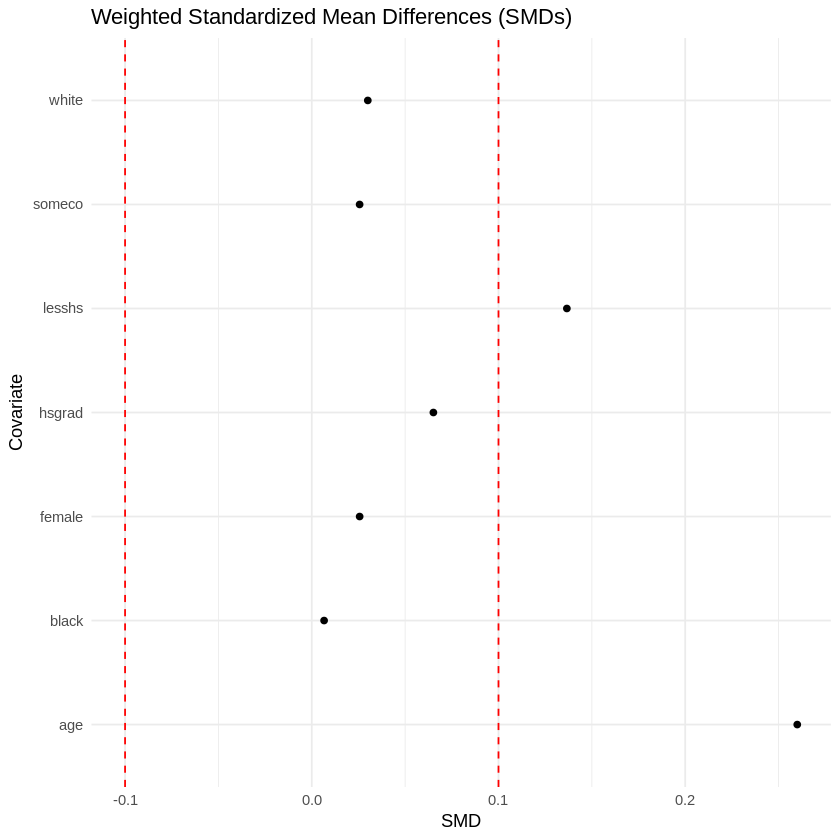

In [ ]:
install.packages("tidyr")

# loading necessary libraries
library(tidyr) # Make sure tidyr is loaded

# defining the survey design w/ weights
design <- svydesign(ids = ~1, data = data, weights = ~weight)

# calculating weighted covariate means and SMDs
covariates <- c("female", "age", "lesshs", "hsgrad", "someco", "white", "black")
weighted_means <- svyby(~female + age + lesshs + hsgrad + someco + white + black,
                        ~dis_hp, design, svymean)

# computing smds using weighted means and pooled standard deviations
balance_table <- weighted_means %>%
  pivot_longer(-dis_hp, names_to = "Covariate", values_to = "Mean") %>%
  group_by(Covariate) %>%
  summarize(SMD = abs(diff(Mean)) /
                  sqrt(mean((sd(data[[first(Covariate)]][data$dis_hp == 1])^2 + # Use first(Covariate)
                             sd(data[[first(Covariate)]][data$dis_hp == 0])^2)))) # Use first(Covariate)

# filtering out standard error variables (SE variables) from the balance table
balance_table <- balance_table %>%
  filter(!grepl("^se\\.", Covariate))

# creating a love plot for SMDs
ggplot(balance_table, aes(x = SMD, y = Covariate)) +
  geom_point() +
  geom_vline(xintercept = c(-0.1, 0.1), linetype = "dashed", color = "red") +
  labs(title = "Weighted Standardized Mean Differences (SMDs)",
       x = "SMD", y = "Covariate") +
  theme_minimal()

# saving the plot as png file
ggsave("weighted_smd_plot.png", width = 8, height = 6, dpi = 300)

In [ ]:
# loading necessary libraries
library(dplyr)
library(ggplot2)

# filtering data for relevant age range and valid weights
data <- data %>%
  filter(age >= 21 & age <= 58 & !is.na(fnlwgt)) %>%
  mutate(
    # binary treatment indicator for self-reported disability/health problem
    dis_hp_binary = ifelse(dis_hp == 1, 1, 0),

    # treatment group categorization
    disability_category = case_when(
      dis_hp == 1 ~ "Self-reported Disability - Health Problem",
      dis_hp == 2 ~ "No Self-reported Disability",
      TRUE ~ NA_character_
    ),

    # categorize age group
    age_category = case_when(
      age >= 21 & age <= 39 ~ "21-39",
      age >= 40 & age <= 58 ~ "40-58",
      TRUE ~ NA_character_
    ),

    # categorize education level
    education_category = case_when(
      lesshs == 1 ~ "Less than High School",
      hsgrad == 1 ~ "High School Graduate",
      someco == 1 ~ "Some College",
      TRUE ~ NA_character_
    ),

    # region categorization
    region_category = case_when(
      midatl == 1 ~ "Mid-Atlantic",
      eastnor == 1 ~ "East North Central",
      westnor == 1 ~ "West North Central",
      southatl == 1 ~ "South Atlantic",
      eaststh == 1 ~ "East South Central",
      weststh == 1 ~ "West South Central",
      mountain == 1 ~ "Mountain",
      pacific == 1 ~ "Pacific",
      TRUE ~ "New England"  # Default baseline
    ),

    # gender categorization
    female_category = case_when(
      female == 1 ~ "Female",
      TRUE ~ "Male"
    ),

    # race categorization
    race_category = case_when(
      white == 1 ~ "White",
      black == 1 ~ "Black",
      other == 1 ~ "Other",
      TRUE ~ NA_character_
    ),

    # handling zeros or negatives in avgwkly for log transformation
    avgwkly = ifelse(avgwkly > 0, avgwkly, NA),
    lavgwkly = log(avgwkly)
  ) %>%
  # converting categorical variables to factors
  mutate(
    age_category = as.factor(age_category),
    education_category = as.factor(education_category),
    region_category = as.factor(region_category),
    female_category = as.factor(female_category),
    race_category = as.factor(race_category),
    disability_category = as.factor(disability_category)
  ) %>%
  # filtering out rows w/ missing or invalid values for key variables
  filter(
    !is.na(education_category),
    !is.na(race_category),
    !is.na(wkswork),
    !is.na(avgwkly)
  )

# applying weights to match desired proportions
data <- data %>%
  mutate(weight = ifelse(dis_hp == 1, 19.3 / 3.5, (100 - 19.3) / (100 - 3.5)))

# grouping individuals by key covariates
X <- data %>%
  select(age_category, education_category, region_category, female_category,
         race_category) %>%
  # converting categorical features to numeric using one-hot encoding
  model.matrix(~ . -1, data = .)

# training causal forest model (cf_lavgwkly)
cf_lavgwkly <- causal_forest(
  X = X,
  Y = as.vector(data$lavgwkly), # dependent variable: log of awe, explicitly converted to a vector
  W = as.vector(data$treatment), # treatment variable: explicitly converted to a vector
  sample.weights = data$fnlwgt, # weighting
  num.trees = 2000, # number of trees
  min.node.size = 10 # minimum nodes
)

data <- data %>%
  mutate(group = paste(female_category, age_category, education_category, region_category, sep = "_"))

# predicting cates for log weekly earnings and adding to the data dataframe
data$cates_lavgwkly <- predict(cf_lavgwkly)$predictions


# calculating weighted group-level cates
group_cates <- data %>%
  group_by(group) %>%
  summarize(
    avg_cate_lavgwkly = weighted.mean(cates_lavgwkly, w = weight, na.rm = TRUE),
    count = n(),  # number of individuals in each group
    .groups = "drop"
  )

# identifying top and bottom groups for log weekly earnings
top_groups_lavgwkly <- group_cates %>% arrange(desc(avg_cate_lavgwkly)) %>% slice_head(n = 5)
bottom_groups_lavgwkly <- group_cates %>% arrange(avg_cate_lavgwkly) %>% slice_head(n = 5)
filtered_groups_lavgwkly <- bind_rows(top_groups_lavgwkly, bottom_groups_lavgwkly)

# plotting top and bottom groups for log weekly earnings
log_weekly_earnings_plot <- ggplot(filtered_groups_lavgwkly, aes(x = reorder(group, avg_cate_lavgwkly), y = avg_cate_lavgwkly)) +
  geom_bar(stat = "identity", fill = "blue") +
  coord_flip() +
  labs(
    title = "Top and Bottom Groups: Weighted Average CATE for Log Weekly Earnings",
    x = "Group",
    y = "Weighted Average CATE (Log Weekly Earnings)"
  ) +
  theme_minimal()

# saving the plot
ggsave(
  filename = "weighted_top_bottom_groups_cate_log_weekly_earnings.png",
  plot = log_weekly_earnings_plot,
  width = 10,
  height = 8,
  dpi = 300
)

In [ ]:
# loading necessary libraries
library(dplyr)
library(ggplot2)
library(grf)

# function to train causal forests, predict cates, and generate plots for a specific group
analyze_cates <- function(data, dis_hp_value, group_label) {
  # filtering data for the specified group (disabled or non-disabled)
  group_data <- data %>% filter(dis_hp == dis_hp_value)

  # preparing covariates for causal forest
  X <- group_data %>%
    select(age_category, education_category, region_category, female_category, race_category) %>%
    model.matrix(~ . - 1, data = .)  # One-hot encoding (drops intercept)

  # training the causal forest for weeks worked (cf_wkswork)
  cf_wkswork <- causal_forest(
    X = X,
    Y = as.vector(group_data$wkswork),  # outcome variable
    W = as.vector(group_data$treatment),  # treatment indicator
    sample.weights = group_data$fnlwgt,  # weights
    num.trees = 2000,
    min.node.size = 10
  )

  # training the causal forest for log weekly earnings (cf_lavgwkly)
  cf_lavgwkly <- causal_forest(
    X = X,
    Y = as.vector(group_data$lavgwkly),  # outcome variable
    W = as.vector(group_data$treatment),  # treatment indicator
    sample.weights = group_data$fnlwgt,  # weights
    num.trees = 2000,
    min.node.size = 10
  )

  # predicting cates
  group_data$cates_wkswork <- predict(cf_wkswork)$predictions
  group_data$cates_lavgwkly <- predict(cf_lavgwkly)$predictions

  # grouping individuals by covariates
  group_data$group <- paste(
    group_data$female_category, group_data$age_category, group_data$education_category, group_data$region_category, sep = "_"
  )

  # calculating average cates for each group
  group_cates <- group_data %>%
    group_by(group) %>%
    summarize(
      avg_cate_wkswork = mean(cates_wkswork, na.rm = TRUE),
      avg_cate_lavgwkly = mean(cates_lavgwkly, na.rm = TRUE),
      count = n(),
      .groups = "drop"
    )

  # saving summary for review
  print(group_cates)

  # plotting for weeks worked
  top_groups_wkswork <- group_cates %>% arrange(desc(avg_cate_wkswork)) %>% slice_head(n = 5)
  bottom_groups_wkswork <- group_cates %>% arrange(avg_cate_wkswork) %>% slice_head(n = 5)
  filtered_groups_wkswork <- bind_rows(top_groups_wkswork, bottom_groups_wkswork)

  weeks_worked_plot <- ggplot(filtered_groups_wkswork, aes(x = reorder(group, avg_cate_wkswork), y = avg_cate_wkswork)) +
    geom_bar(stat = "identity", fill = "blue") +
    coord_flip() +
    labs(
      title = paste("Top and Bottom Groups (", group_label, "): Average CATE for Weeks Worked", sep = ""),
      x = "Group",
      y = "Average CATE (Weeks Worked)"
    ) +
    theme_minimal()

  # saving plot
  ggsave(
    filename = paste0("top_bottom_groups_cate_weeks_worked_", tolower(group_label), ".png"),
    plot = weeks_worked_plot,
    width = 10,
    height = 8,
    dpi = 300
  )

  # plotting for log weekly earnings
  top_groups_lavgwkly <- group_cates %>% arrange(desc(avg_cate_lavgwkly)) %>% slice_head(n = 5)
  bottom_groups_lavgwkly <- group_cates %>% arrange(avg_cate_lavgwkly) %>% slice_head(n = 5)
  filtered_groups_lavgwkly <- bind_rows(top_groups_lavgwkly, bottom_groups_lavgwkly)

  log_weekly_earnings_plot <- ggplot(filtered_groups_lavgwkly, aes(x = reorder(group, avg_cate_lavgwkly), y = avg_cate_lavgwkly)) +
    geom_bar(stat = "identity", fill = "green") +
    coord_flip() +
    labs(
      title = paste("Top and Bottom Groups (", group_label, "): Average CATE for Log Weekly Earnings", sep = ""),
      x = "Group",
      y = "Average CATE (Log Weekly Earnings)"
    ) +
    theme_minimal()

  # savingplot
  ggsave(
    filename = paste0("top_bottom_groups_cate_log_weekly_earnings_", tolower(group_label), ".png"),
    plot = log_weekly_earnings_plot,
    width = 10,
    height = 8,
    dpi = 300
  )
}

# running analysis for disabled individuals (dis_hp = 1)
analyze_cates(data, dis_hp_value = 1, group_label = "Disabilities")

# running analysis for non-disabled individuals (dis_hp = 0)
analyze_cates(data, dis_hp_value = 0, group_label = "No Disabilities")

ggsave(
  filename = "top_bottom_groups_cate_log_weekly_earnings_disabilities.png",
  plot = log_weekly_earnings_plot,
  width = 10,
  height = 8,
  dpi = 300
)

# A tibble: 102 × 4
   group                                avg_cate_wkswork avg_cate_lavgwkly count
   <chr>                                           <dbl>             <dbl> <int>
 1 Female_21-39_High School Graduate_E…             3.87             0.423     8
 2 Female_21-39_High School Graduate_M…             4.05             0.432     5
 3 Female_21-39_High School Graduate_M…             3.93             0.412     8
 4 Female_21-39_High School Graduate_N…             4.03             0.428     3
 5 Female_21-39_High School Graduate_P…             3.89             0.420     5
 6 Female_21-39_High School Graduate_S…             3.84             0.430    11
 7 Female_21-39_High School Graduate_W…             3.94             0.396     1
 8 Female_21-39_High School Graduate_W…             3.97             0.417     1
 9 Female_21-39_Less than High School_…             3.85             0.414     6
10 Female_21-39_Less than High School_…             4.10             0.411     1
# ℹ 92 m

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-4.0892 -1.4330 -0.5270 -0.3060  0.6898  5.6920 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.21097  0.04938  0.13243  0.12517  0.18793  0.55357 
[1] 1.603661
[1] 0.1261459


Saving 7 x 7 in image


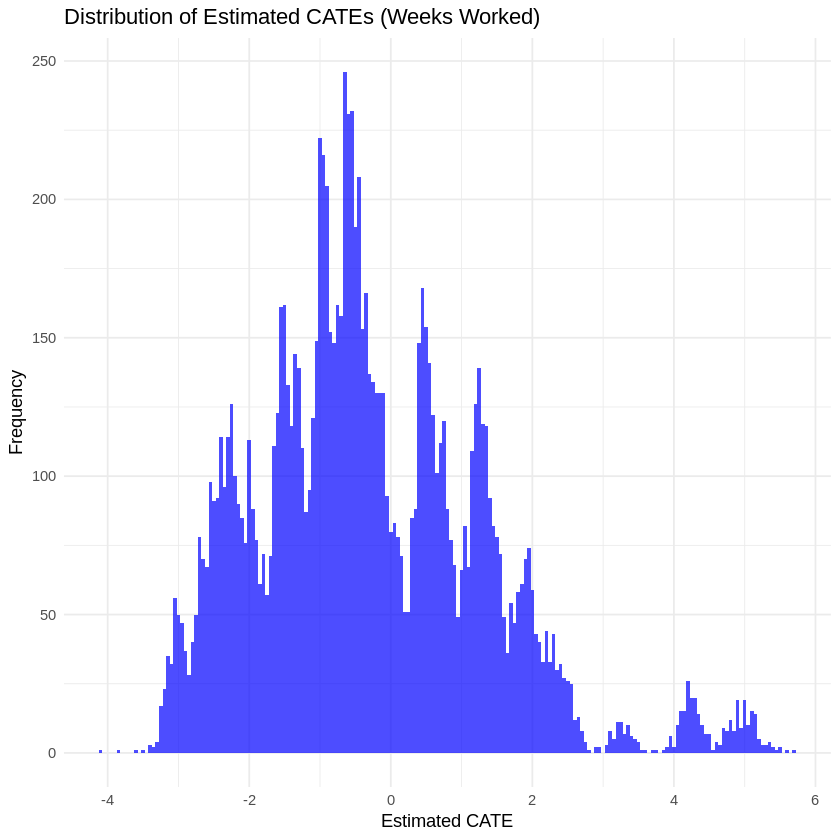

Saving 7 x 7 in image
Warning message in average_treatment_effect(cf_wkswork, target.sample = "all"):
“Estimated treatment propensities go as high as 0.996 which means that treatment effects for some treated units may not be well identified. In this case, using `target.sample=control` may be helpful.”
Warning message in average_treatment_effect(cf_lavgwkly, target.sample = "all"):
“Estimated treatment propensities go as high as 0.991 which means that treatment effects for some treated units may not be well identified. In this case, using `target.sample=control` may be helpful.”


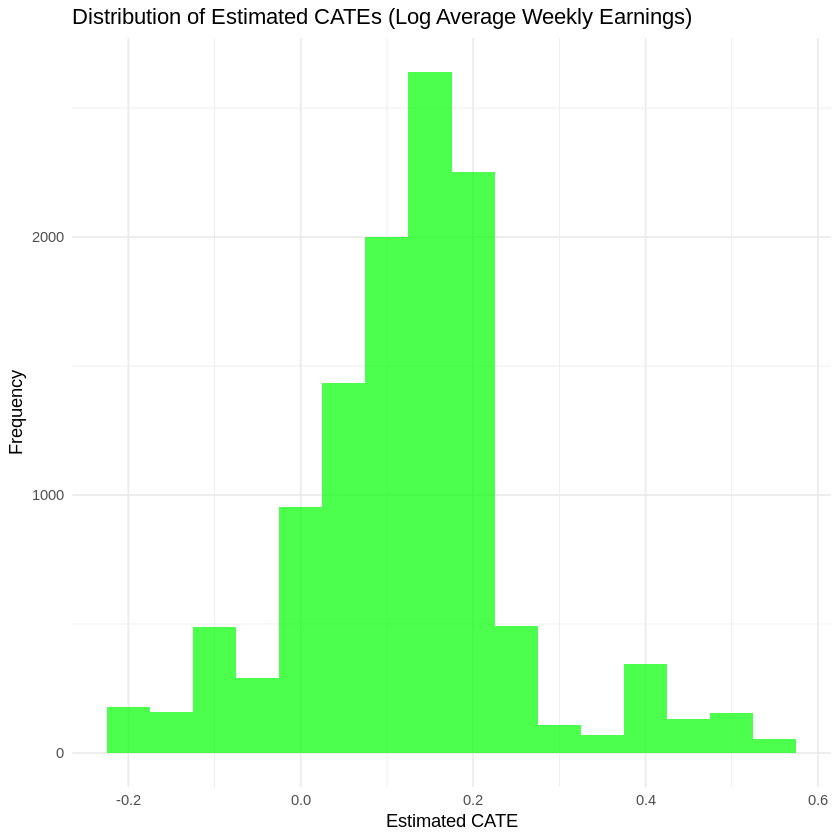

Saving 7 x 7 in image
Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


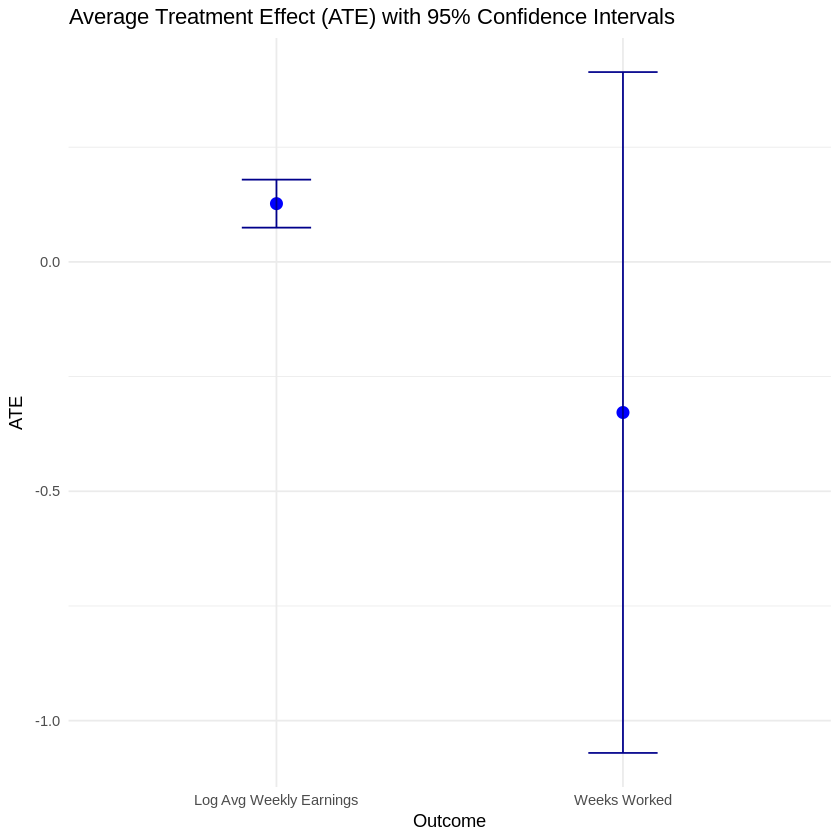

disability_status,mean_cate,sd_cate,max_cate,min_cate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.2825397,1.643620,5.486287,-3.290374
2,-0.3069050,1.602135,5.692027,-4.089192


 disability_status      cate    
 Min.   : NA       Min.   : NA  
 1st Qu.: NA       1st Qu.: NA  
 Median : NA       Median : NA  
 Mean   :NaN       Mean   :NaN  
 3rd Qu.: NA       3rd Qu.: NA  
 Max.   : NA       Max.   : NA  

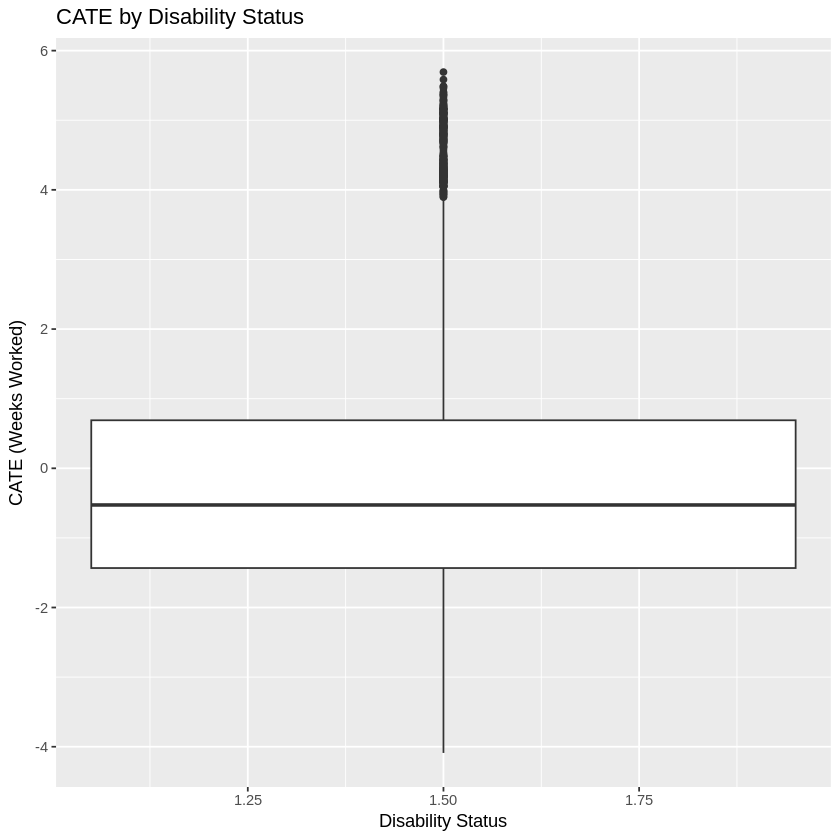

In [ ]:
# predicting cates
cate_wkswork <- predict(cf_wkswork)$predictions
cate_lavgwkly <- predict(cf_lavgwkly)$predictions

write.csv(cate_wkswork, "cate_predictions_wkswork.csv", row.names = FALSE)
write.csv(cate_lavgwkly, "cate_predictions_lavgwkly.csv", row.names = FALSE)

# summarizing variation of CATE
print(summary(cate_wkswork))
print(summary(cate_lavgwkly))

print(sd(cate_wkswork, na.rm = TRUE))  # Standard deviation
print(sd(cate_lavgwkly, na.rm = TRUE)) # Standard deviation

# plotting cate distributions
ggplot(data.frame(CATEs = cate_wkswork), aes(x = CATEs)) +
  geom_histogram(binwidth = 0.05, fill = "blue", alpha = 0.7) +
  labs(
    title = "Distribution of Estimated CATEs (Weeks Worked)",
    x = "Estimated CATE",
    y = "Frequency"
  ) +
  theme_minimal()

ggsave("cate_distribution_wkswork.pdf")

ggplot(data.frame(CATEs = cate_lavgwkly), aes(x = CATEs)) +
  geom_histogram(binwidth = 0.05, fill = "green", alpha = 0.7) +
  labs(
    title = "Distribution of Estimated CATEs (Log Average Weekly Earnings)",
    x = "Estimated CATE",
    y = "Frequency"
  ) +
  theme_minimal()

ggsave("cate_distribution_log_avgwkly.pdf")

# calculating ate for weeks worked
ate_wkswork <- average_treatment_effect(cf_wkswork, target.sample = "all")
ate_wkswork_summary <- data.frame(
  ATE = ate_wkswork[1],
  LowerCI = ate_wkswork[1] - 1.96 * ate_wkswork[2],
  UpperCI = ate_wkswork[1] + 1.96 * ate_wkswork[2]
)

# calculating cate for log average weekly earnings
ate_lavgwkly <- average_treatment_effect(cf_lavgwkly, target.sample = "all")
ate_lavgwkly_summary <- data.frame(
  ATE = ate_lavgwkly[1],
  LowerCI = ate_lavgwkly[1] - 1.96 * ate_lavgwkly[2],
  UpperCI = ate_lavgwkly[1] + 1.96 * ate_lavgwkly[2]
)

# combining ate results into a single data frame
ate_results <- data.frame(
  Outcome = c("Weeks Worked", "Log Avg Weekly Earnings"),
  ATE = c(ate_wkswork_summary$ATE, ate_lavgwkly_summary$ATE),
  LowerCI = c(ate_wkswork_summary$LowerCI, ate_lavgwkly_summary$LowerCI),
  UpperCI = c(ate_wkswork_summary$UpperCI, ate_lavgwkly_summary$UpperCI)
)

# plotting ate error bars for confidence intervals
ggplot(ate_results, aes(x = Outcome, y = ATE)) +
  geom_point(size = 3, color = "blue") + # ATE points
  geom_errorbar(aes(ymin = LowerCI, ymax = UpperCI), width = 0.2, color = "darkblue") + # Confidence intervals
  labs(
    title = "Average Treatment Effect (ATE) with 95% Confidence Intervals",
    x = "Outcome",
    y = "ATE"
  ) +
  theme_minimal()

# saving plot
ggsave("ate_plot.pdf")

# cate by disability
cate_by_disability <- data.frame(
  disability = data$dis_hp,
  cate = predict(cf_wkswork)$predictions
)

ggplot(cate_by_disability, aes(x = disability, y = cate)) +
  geom_boxplot() +
  labs(title = "CATE by Disability Status", x = "Disability Status", y = "CATE (Weeks Worked)")

# cate in disability
cate_analysis <- data.frame(
  disability_status = data$dis_hp,
  cate = predict(cf_wkswork)$predictions
)
cate_analysis %>%
  group_by(disability_status) %>%
  summarize(
    mean_cate = mean(cate, na.rm = TRUE),
    sd_cate = sd(cate, na.rm = TRUE),
    max_cate = max(cate, na.rm = TRUE),
    min_cate = min(cate, na.rm = TRUE)
  )
outliers <- cate_analysis %>%
  filter(cate > 5 & disability_status == 1.5)  # Customize threshold
summary(outliers)

 estimate   std.err 
0.4142441 0.2798065 


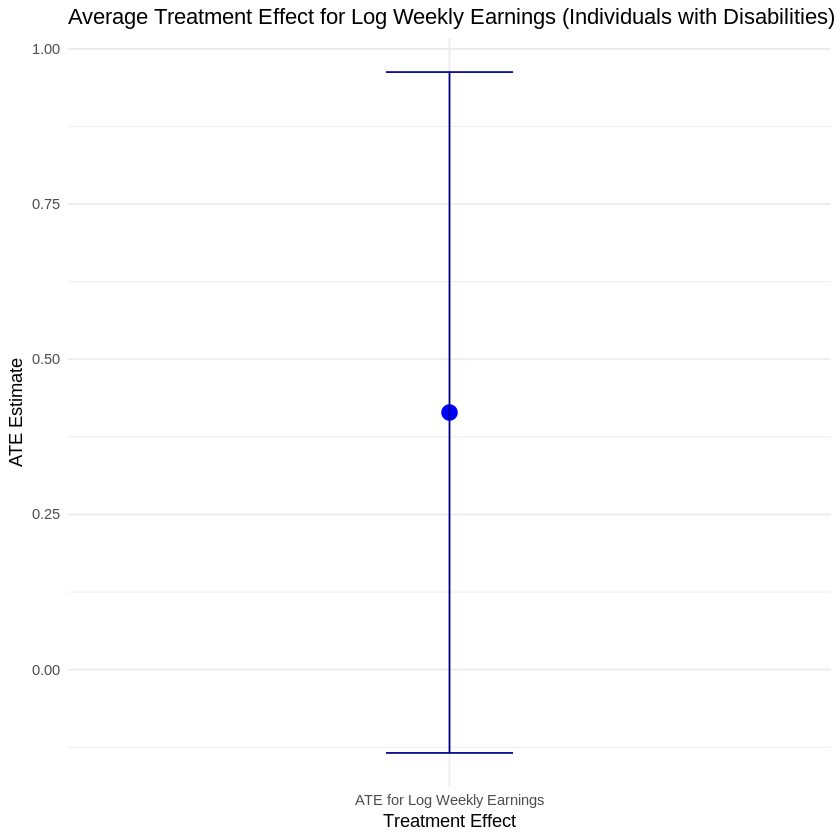

In [ ]:
# loading necessary libraries
library(dplyr)
library(grf)
library(ggplot2)

# filtering data for individuals w/ disabilities (dis_hp = 1)
disabled_data <- data %>% filter(dis_hp == 1)

# preparing covariates for causal forest
X <- disabled_data %>%
  select(age_category, education_category, region_category, female_category, race_category) %>%
  model.matrix(~ . - 1, data = .)

# calculating weights for treatment
disabled_data <- disabled_data %>%
  mutate(weighted_dis_hp = ifelse(
    treatment == 1,
    fnlwgt / sum(fnlwgt[treatment == 1]),
    fnlwgt / sum(fnlwgt[treatment == 0])
  ))

# training the causal forest for log weekly earnings (lavgwkly)
cf_lavgwkly <- causal_forest(
  X = X,
  Y = as.vector(disabled_data$lavgwkly),  # outcome variable
  W = as.vector(disabled_data$treatment),  # treatment indicator
  sample.weights = disabled_data$weighted_dis_hp,  # adjusted weights
  num.trees = 2000,
  min.node.size = 10
)

# calculating ate
ate <- average_treatment_effect(cf_lavgwkly)
print(ate)  # Prints the ATE and its standard error

# graphing ate
ate_result <- data.frame(
  ATE = ate[1],
  Lower_CI = ate[1] - 1.96 * ate[2],  # 95% CI lower bound
  Upper_CI = ate[1] + 1.96 * ate[2]   # 95% CI upper bound
)

# creating ate plot
ate_plot <- ggplot(ate_result, aes(x = "ATE for Log Weekly Earnings", y = ATE)) +
  geom_point(size = 4, color = "blue") +
  geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.2, color = "darkblue") +
  labs(
    title = "Average Treatment Effect for Log Weekly Earnings (Individuals with Disabilities)",
    x = "Treatment Effect",
    y = "ATE Estimate"
  ) +
  theme_minimal()

# saving plot
ggsave(
  filename = "ate_log_weekly_earnings_disabled.png",
  plot = ate_plot,
  width = 8,
  height = 6,
  dpi = 300
)
print(ate_plot)